# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [30]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [32]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [33]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [34]:
# Extract all rows of data
table = soup.find('table', class_='table') 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [35]:
# Create an empty list
rows = []
# Loop through the scraped data to create a list of rows
for tr in table.find_all('tr'):  # Loop through each row in the table
    row_data = [td.get_text() for td in tr.find_all('td')]  # Extract text from each table data cell
    if row_data:  # Avoid appending empty rows
        rows.append(row_data)

In [36]:
# Define the column names based on the table headers
headers = [th.get_text() for th in table.find_all('th')]

# Create a Pandas DataFrame by using the list of rows and the headers as column names
mars_df = pd.DataFrame(rows, columns=headers)

In [37]:
# Confirm DataFrame was created successfully
mars_df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [38]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [39]:
# Change data types for data analysis

mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])  # Convert to datetime
mars_df['sol'] = mars_df['sol'].astype('int32')  # Convert to integer
mars_df['ls'] = mars_df['ls'].astype('int32')    # Convert to integer
mars_df['month'] = mars_df['month'].astype('int32')  # Convert to integer
mars_df['min_temp'] = mars_df['min_temp'].astype('float64')  # Convert to float
mars_df['pressure'] = mars_df['pressure'].astype('float64')  # Convert to float

In [40]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [41]:
# 1. How many months are there on Mars?
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
num_months = mars_df['month'].nunique()
num_months

12

In [42]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_df['sol'].nunique()
num_sols

1867

In [43]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

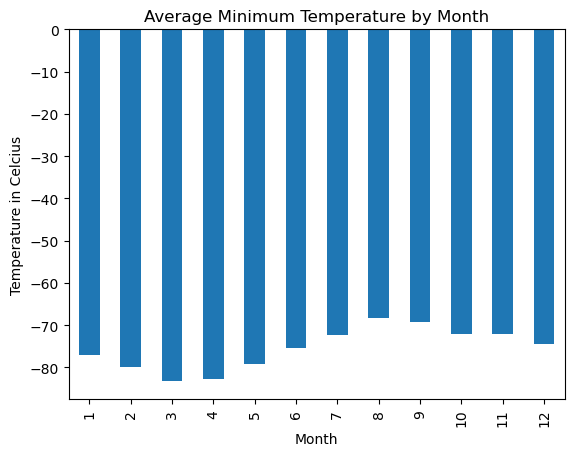

In [44]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', ylabel='Temperature in Celcius', xlabel='Month', title='Average Minimum Temperature by Month')
plt.show()

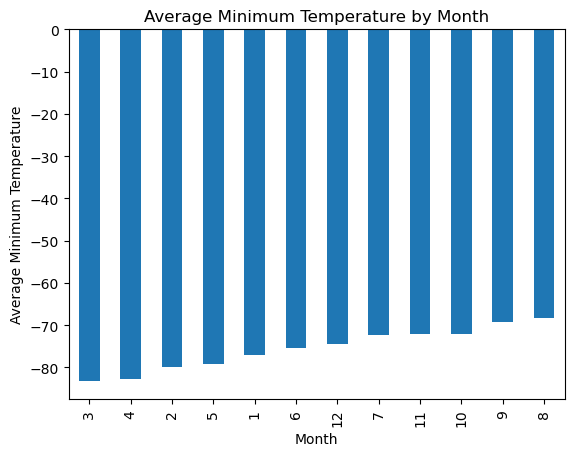

In [45]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_by_month_sorted = mars_df.groupby('month')['min_temp'].mean().sort_values()
# Plot the average minimum temperature by month (sorted)
avg_min_temp_by_month_sorted.plot(kind='bar')
plt.ylabel('Average Minimum Temperature')
plt.xlabel('Month')
plt.title('Average Minimum Temperature by Month')
plt.show()

In [46]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

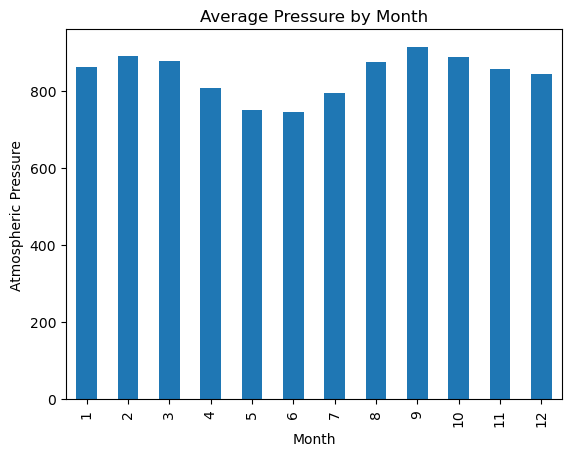

In [47]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', ylabel='Atmospheric Pressure', xlabel='Month', title='Average Pressure by Month')
plt.show()

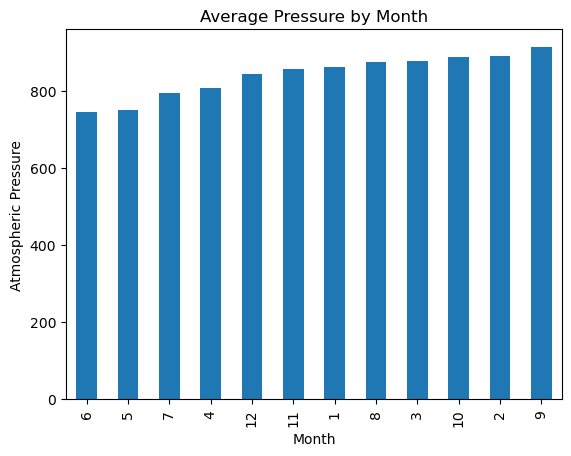

In [48]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_by_month_sorted = mars_df.groupby('month')['pressure'].mean().sort_values()

# Plot the average pressure by month (sorted)
avg_pressure_by_month_sorted.plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.xlabel('Month')
plt.title('Average Pressure by Month')
plt.show()

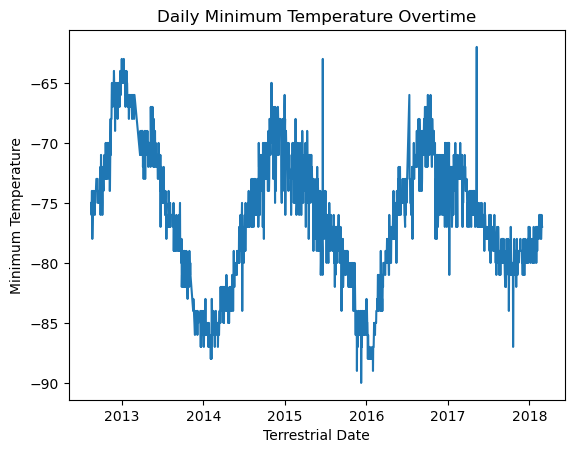

In [49]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'])
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature')
plt.title('Daily Minimum Temperature Overtime')
plt.show()

#### Minimum Temperature


In [50]:
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()
print(f"The coldest month is month {coldest_month}, and the hottest month is month {hottest_month}.")

The coldest month is month 3, and the hottest month is month 8.


#### Atmospheric Pressure


In [51]:
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()
print(f"The month with the lowest pressure is month {lowest_pressure_month}, and the month with the highest pressure is month {highest_pressure_month}.")

The month with the lowest pressure is month 6, and the month with the highest pressure is month 9.


#### Year Length


In [59]:
significant_lows = [pd.Timestamp('2012-08-21'), pd.Timestamp('2014-06-30')]

martian_year_length = (significant_lows[1] - significant_lows[0]).days
print(f"The estimated length of a Martian year is approximately {martian_year_length} Earth days.")

The estimated length of a Martian year is approximately 678 Earth days.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [60]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)

In [61]:
browser.quit()